Basic Imports

In [1]:
import pandas
import marketData
import Orders
import Plot
import Indicators

Getting price charts

[        nan         nan         nan ... 38.94827586 15.61929973
  7.19099704]
                         Open      High       Low     Close   Volume  \
Time                                                                   
2021-03-06 16:40:00  47557.73  47600.00  47555.05  47580.65   95.957   
2021-03-06 16:41:00  47580.65  47645.40  47580.64  47601.01  117.393   
2021-03-06 16:42:00  47601.00  47650.00  47571.83  47650.00  120.391   
2021-03-06 16:43:00  47650.00  47699.83  47622.17  47671.94  174.845   
2021-03-06 16:44:00  47671.94  47700.00  47622.79  47697.26  151.219   
...                       ...       ...       ...       ...      ...   
2021-03-08 18:35:00  50953.43  50988.00  50949.54  50977.78   42.201   
2021-03-08 18:36:00  50977.78  50980.08  50942.23  50949.99   48.909   
2021-03-08 18:37:00  50949.99  50959.14  50910.00  50910.00   66.002   
2021-03-08 18:38:00  50910.01  50927.06  50873.01  50887.26   98.808   
2021-03-08 18:39:00  50887.26  50903.91  50871.45  50882.

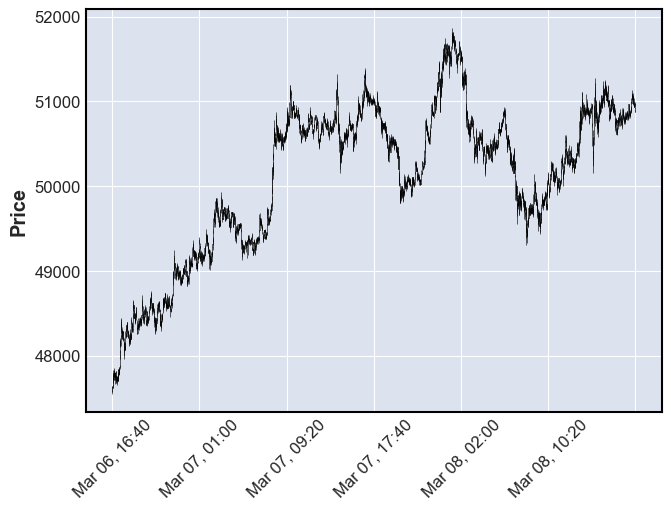

In [5]:
#df = marketData.getPrices("BTCUSDT", "1m", 500)
#print(df)
df = pandas.read_csv("BTCUSDT1mtest.csv")
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
df["Time"] = pandas.to_datetime(df["Time"])
df.set_index("Time", inplace=True)
Plot.plotCandles(df)
df.to_csv("BTCUSDT1mtestQ.csv")
print(df)

Getting order book

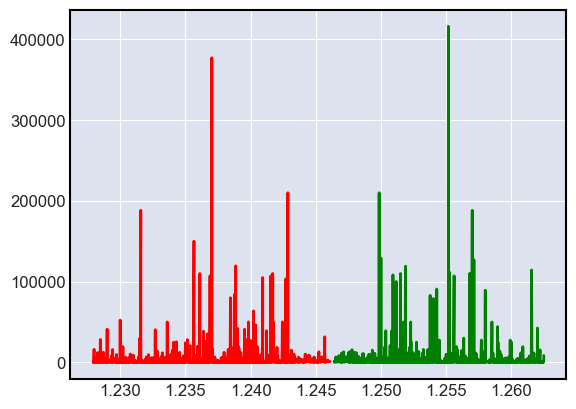

In [28]:
df = Orders.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])

Getting historical data

In [4]:
import time
#Time to nanoseconds
pair = "BTCUSDT"
timeframe = "1m"
current = time.time() * 1000
current = round(current)
#Time step for requests
block = 500*60*1000
current -= block
#Populating latest
df = marketData.getPrices(pair, timeframe, 500)
for i in range(0, 5):
    print(i)
    df = df.append(marketData.getHistorical(pair, timeframe, current - block, current))
    current -= block

df = df.sort_index()
df.to_csv(pair+timeframe+"test.csv")

0
1
2
3
4


Using Keras

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


dataset = pd.read_csv("Data/dataset.csv").apply(pd.to_numeric)
labels = dataset.pop("Position").to_numpy()
dataset.pop("0")
dataset = dataset.to_numpy()
print(dataset.shape)



model = tf.keras.models.Sequential([
    keras.layers.Dense(400, activation="sigmoid"),
    keras.layers.Dense(600, activation="sigmoid"),
    #tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(600),
    keras.layers.Dense(400),
    keras.layers.Dense(100),
    keras.layers.Dense(3, activation="softmax")
])

print("Compiling model")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Checkpointing
checkpoint_path = "checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)
#model.load_weights(checkpoint_path)

print("Fitting")
model.fit(dataset, labels, epochs=10, callbacks=[cp_callback])


(250402, 400)
Compiling model
Fitting
Epoch 1/10
250402/250402 [==============================] - 18s 73us/sample - loss: 1342568626.9889 - acc: 0.3337

preparing as a single csv

In [1]:
import pandas as pd
features = pd.read_csv("Data/validationvalues.csv")
labels = pd.read_csv("Data/validationlabels.csv")
labels.columns=["Position"]

df = pd.concat([features,labels], axis=1)
print(df)
df.to_csv("Data/validationdataset.csv")
print("Done!")


             0         1         2         3         4         5         6  \
0     0.076808  0.085366  0.079991  0.081826  0.040748 -0.035114 -0.219176   
1     0.081826  0.112064  0.089151  0.119904  0.085340  0.103074 -0.069262   
2     0.119904  0.119040  0.106615  0.103982  0.074239  0.245817  0.104592   
3     0.102981  0.106728  0.108562  0.109490  0.052369  0.171649  0.173513   
4     0.109139  0.128401  0.118419  0.125523  0.074012  0.215629  0.211032   
...        ...       ...       ...       ...       ...       ...       ...   
2911  0.036047  0.032606  0.035310  0.029802  0.060343  0.154829 -0.003964   
2912  0.029802  0.029056  0.038171  0.041118  0.007498  0.099849  0.077130   
2913  0.042463  0.041621  0.043235  0.043960  0.017496 -0.052524  0.067385   
2914  0.044446  0.042454  0.041511  0.041774  0.020097 -0.283016 -0.078564   
2915  0.041527  0.034969  0.037502  0.025671 -0.000772 -0.228821 -0.188120   

             7         8         9  ...       391  392  393  39